# ◆Mushroom Classification Safe to eat or deadly poison?
### 目的：きのこの形状等から食用か有毒かを予測するモデルをニューラルネットワークで構築する
### 目的変数をclass(食用か有毒か)とする二値分類問題とする
- kaggle URL:https://www.kaggle.com/uciml/mushroom-classification/data
- Create Date：2020/01/18　Author：M.Hasegawa
### ────────────────────────────────────────────────────────────────

### 【手順】

### 0.Notebook内で利用する関数の定義

### 1.データ読込
- 欠損項目を確認する

### 2.データ前処理
- 目的変数を説明するのに有効そうな説明変数を見つける。
- 目的変数と説明変数の関係を確認するためのグラフを作成する。
- 質的変数が扱えない場合は、ダミー変数に置き換える。

### 3.モデル構築
- ANN ニューラルネットワーク

### 4.モデル評価
- 混同行列を作成し、Accuracy、Recall、Precisionを求める

### ※データセット
- 「mushrooms.csv」（データ数：378,661行15列）

| id |項目|説明|型|特記事項|
|:---:|:---:|:---:|:---:|:---:|
|1|class|毒キノコか|カテゴリ|毒キノコ=p、食用キノコ=e|
|2|cap-shape|傘形状|カテゴり|ベル型=b、円錐型=c、饅頭型=x、扁平型=f、コブ型=k、凹んだ扁平型=s|
|3|cap-surface|傘表面|カテゴリ|繊維=f、溝=g、鱗片=y、滑らか=s|
|4|cap-color|傘の色|カテゴリ|ブラウン=n、バフ=b、シナモン=c、グレー=g、グリーン=r、ピンク=p、パープル=u、レッド=e、ホワイト=w、イエロー=y|
|5|bruises|斑点|2値|斑点あり=t、反転なし=f|
|6|odor|臭気|カテゴリ|アーモンド=a、アニス=l、クレオソート=c、フィッシュ=y、ファウル=f、ミューズイ=m、なし=n、辛味=p、スパイシー=s|
|7|gill-attachment|ひだの付き方|カテゴリ|直生=a、垂生=d、離生=f、凹生=n|
|8|gill-spacing|ひだの間隔|カテゴリ|近い=c、過密=w、長い=d|
|9|gill-size|ひだのサイズ|2値|広い=b、狭い=n|
|10|gill-color|ひだの色|カテゴリ|ブラック=k、ブラウン=n、バフ=b、チョコレート=h、グレー=g、グリーン=r、オレンジ=o、ピンク=p、パープル=u、レッド=e、ホワイト=w、イエロー=y|
|11|stalk-shape|柄の形状|2値|広がり=e、先細り=t|
|12|stalk-root|柄の根|カテゴリ|球根=b、クラブ=c、カップ=u、等しい=e、根茎形態=z、根=r、無し=?|
|13|stalk-surface-above-ring|柄-表面上のリング|カテゴリ|繊維状=f、鱗片状=y、絹毛=k、滑らか=s|
|14|stalk-surface-below-ring|柄-表面下のリング|カテゴリ|繊維状=f、鱗片状=y、絹毛=k、滑らか=s|
|15|stalk-color-above-ring|柄の色-上リング|カテゴリ|ブラウン=n、バフ=b、シナモン=c、グレー=g、オレンジ=o、ピンク=p、赤=e、白=w、黄色=y|
|16|stalk-color-below-ring|柄の色-下リング|カテゴリ|ブラウン=n、バフ=b、シナモン=c、グレー=g、オレンジ=o、ピンク=p、赤=e、白=w、黄色=y|
|17|veil-type|つぼの種類|2値|内皮膜=p、外皮膜=u|
|18|veil-color|つぼの色|カテゴリ|ブラウン=n、オレンジ=o、ホワイト=w、イエロー=y|
|19|ring-number|つばの数|カテゴリ|none=n、one=o、two=t|
|20|ring-type|つばの種類|カテゴリ|クモの巣状=c、消失性=e、炎のような=f、大きな=l、無し=n、垂れた=p、環帯=z|
|21|spore-print-color|胞子の色|カテゴリ|ブラック=k、ブラウン=n、バフ=b、チョコレート=h、グリーン=r、オレンジ=o、パープル=u、ホワイト=w、イエロー=y|
|22|population|集団形成方法|カテゴリ|大多数=a、群れを成して=c、多数=n、分散=s、数個=v、孤立=y|
|23|habitat|生息地|カテゴリ|牧草=g、葉=1、牧草地=m、小道=p、都市=u、廃棄物=w、森=d|

## 0.Notebook内で利用する関数の定義

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix,precision_recall_fscore_support
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

## 1.データ読込

In [2]:
# ****************************************************************************
# ◆ 1.データ読込
# ****************************************************************************
df= pd.read_csv('./input/mushrooms.csv')

print("\n▼ 先頭5行表示")
display(df.head(5))

print("\n▼ 基本統計量")
display(df.describe())

print('\n▼ 欠損データ確認')
display(pd.DataFrame(df.isnull().sum()[df.isnull().sum()>0],columns=['Missing num']))


▼ 先頭5行表示


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g



▼ 基本統計量


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148



▼ 欠損データ確認


,Missing num


キノコの部位
![](https://i.pinimg.com/originals/0a/c6/4f/0ac64fb5a9c29823572de772f4ba1ff1.jpg)

## 2.データ前処理
### 2-1.名称変換

In [3]:
values={"b":"bell","c":"conical","x":"convex","f":"flat","k":"knobbed","s":"sunken"}
df["cap-shape"]=df["cap-shape"].replace(values)
values2={"f": "fibrous", "g": "grooves","y":"scaly","s": "smooth"}
df["cap-surface"]=df["cap-surface"].replace(values2)
values3={"n":"brown","b":"buff","c":"cinnamon","g":"gray","r":"green","p":"pink","u":"purple","e":"red","w":"white","y":"yellow"}
df["cap-color"]=df["cap-color"].replace(values3)
values4={"a":"almond","l":"anise","c":"creosote","y":"fishy","f":"foul","m":"musty","n":"none","p":"pungent","s":"spicy"}
df["odor"]=df["odor"].replace(values4)
values5={"a":"attached","f":"free"}
df["gill-attachment"]=df["gill-attachment"].replace(values5)
values6={"c":"close","w":"crowded"}
df["gill-spacing"]=df["gill-spacing"].replace(values6)
values7={"b":"broad","n":"narrow"}
df["gill-size"]=df["gill-size"].replace(values7)
values8={"k":"black","b":"buff","n":"brown","h":"chocolate","g":"gray","r":"green","o":"orange","p":"pink","u":"purple","e":"red","w":"white","y":"yellow"}
df["gill-color"]=df["gill-color"].replace(values8)
values9={"t":"tapering","e":"enlarging"}
df["stalk-shape"]=df["stalk-shape"].replace(values9)
values10={"b":"bulbous","c":"club","e":"equal","z":"rhizomorphs","r":"rooted","?":"missing"}
df["stalk-root"]=df["stalk-root"].replace(values10)
values11={"s":"smooth","k":"silky","f":"fibrous","y":"scaly"}
df["stalk-surface-above-ring"]=df["stalk-surface-above-ring"].replace(values11)
df["stalk-surface-below-ring"]=df["stalk-surface-below-ring"].replace(values11)
values12={"n":"brown","b":"buff","c":"cinnamon","g":"gray","p":"pink","e":"red","w":"white","y":"yellow","o":"orange"}
df["stalk-color-above-ring"]=df["stalk-color-above-ring"].replace(values12)
df["stalk-color-below-ring"]=df["stalk-color-below-ring"].replace(values12)
veil_type={"p":"partial","u":"universal"} 
df["veil-type"]=df["veil-type"].replace(veil_type)
veil_color={"n":"brown","o":"orange","w":"white","y":"yellow"} 
df["veil-color"]=df["veil-color"].replace(veil_color)
ring_number= {"n":"none","o":"one","t":"two"}
df["ring-number"]=df["ring-number"].replace(ring_number)
ring_type={"c":"cobwebby","e":"evanescent","f":"flaring","l":"large","n":"none","p":"pendant","s":"sheathing","z":"zone"}
df["ring-type"]=df["ring-type"].replace(ring_type)
spore_print_color= {"k":"black","n":"brown","b":"buff","h":"chocolate","r":"green","o":"orange","u":"purple","w":"white","y":"yellow"}
df["spore-print-color"]=df["spore-print-color"].replace(spore_print_color)
population={"a":"abundant","c":"clustered","n":"numerous","s":"scattered","v":"several","y":"solitary"}
df["population"]=df["population"].replace(population)
habitat={"g":"grasses","l":"leaves","m":"meadows","p":"paths","u":"urban","w":"waste","d":"woods"}
df["habitat"]=df["habitat"].replace(habitat)
bruises={"t":"bruises","f":"no"}
df["bruises"]=df["bruises"].replace(bruises)

### 2-2. 目的変数の確認


▼ 目的変数classの種類（%）


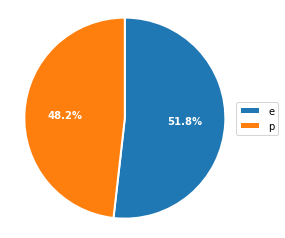

→食用のほうが若干多い

▼ 件数（食用キノコ=1，毒キノコ=0）


,class
1,4208
0,3916



▼ 食用きのこ率
baseline= 0.517971442639094

▼ 先頭5行表示


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,1,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,1,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,0,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,1,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


In [4]:
print('\n▼ 目的変数classの種類（%）')
per_class = round(df['class'].value_counts() / len(df['class']) * 100,2)
values = list(per_class.values)

# 円グラフ
plt.figure(figsize=(4,4))
plt.pie(values, labels=list(per_class.index),
        wedgeprops={'linewidth': 2,'edgecolor':'white'},
        textprops={'color': 'white', 'weight': 'bold'},
        counterclock=False,startangle=90,
        autopct=lambda p: '{:.1f}%'.format(p) if p >= 2.5 else '')
lgnd=plt.legend(bbox_to_anchor=(1.0, 0.25, 1.55, 0.5), loc="center left", borderaxespad=0.)
plt.axis('equal')
plt.show()
print('→食用のほうが若干多い')

# 変換（食用キノコ=1，毒キノコ=0）
df['class'] = df['class'].map({'p': 0,'e': 1})

print('\n▼ 件数（食用キノコ=1，毒キノコ=0）')
display(pd.DataFrame(df['class'].value_counts(),columns=['class']))

# 食用率の平均
print('\n▼ 食用きのこ率')
baseline = df['class'].mean()
print('baseline=',baseline)

print("\n▼ 先頭5行表示")
display(df.head(5))

### 2-3.説明変数の前処理

In [5]:
edible=df[df["class"]=="e"]
poisonous=df[df["class"]=="p"]

gill_attachment_edible=pd.DataFrame(edible["gill-attachment"].value_counts())
gill_attachment_poisonous=pd.DataFrame(poisonous["gill-attachment"].value_counts())
gill_spacing_edible=pd.DataFrame(edible["gill-spacing"].value_counts())
gill_spacing_poisonous=pd.DataFrame(poisonous["gill-spacing"].value_counts())
gill_size_edible=pd.DataFrame(edible["gill-size"].value_counts())
gill_size_poisonous=pd.DataFrame(poisonous["gill-size"].value_counts())
gill_color_edible=pd.DataFrame(edible["gill-color"].value_counts())
gill_color_poisonous=pd.DataFrame(poisonous["gill-color"].value_counts())

stalk_shape_edible=pd.DataFrame(edible["stalk-shape"].value_counts())
stalk_shape_poisonous=pd.DataFrame(poisonous["stalk-shape"].value_counts())
stalk_root_edible=pd.DataFrame(edible["stalk-root"].value_counts())
stalk_root_poisonous=pd.DataFrame(poisonous["stalk-root"].value_counts())
stalk_surface_above_ring_edible=pd.DataFrame(edible["stalk-surface-above-ring"].value_counts())
stalk_surface_above_ring_poisonous=pd.DataFrame(poisonous["stalk-surface-above-ring"].value_counts())
stalk_surface_below_ring_edible=pd.DataFrame(edible["stalk-surface-below-ring"].value_counts())
stalk_surface_below_ring_poisonous=pd.DataFrame(poisonous["stalk-surface-below-ring"].value_counts())
stalk_color_above_ring_edible=pd.DataFrame(edible["stalk-color-above-ring"].value_counts())
stalk_color_above_ring_poisonous=pd.DataFrame(poisonous["stalk-color-above-ring"].value_counts())
stalk_color_below_ring_edible=pd.DataFrame(edible["stalk-color-below-ring"].value_counts())
stalk_color_below_ring_poisonous=pd.DataFrame(poisonous["stalk-color-below-ring"].value_counts())

edible_veil_color=pd.DataFrame(edible["veil-color"].value_counts())
poisonous_veil_color=pd.DataFrame(poisonous["veil-color"].value_counts())

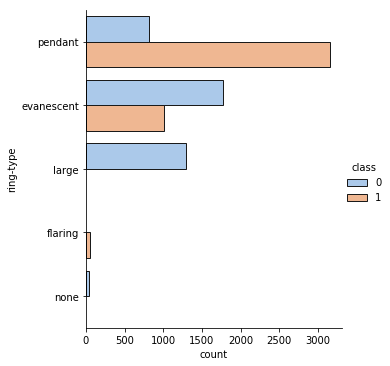

In [6]:
sns.catplot(y="ring-type", hue="class", kind="count",height=5,
            palette="pastel", edgecolor=".1",
            data=df)

## 3.モデル構築

In [7]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])
    
y = df["class"].values
x = df.drop(["class"],axis=1)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=1)


from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential # initialize neural network library
from keras.layers import Dense # build our layers library

def build_classifier():
    classifier = Sequential() # initialize neural network
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = x_train.shape[1]))
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

classifier = KerasClassifier(build_fn = build_classifier, epochs = 30,batch_size=10,verbose=0)
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 3)
mean = accuracies.mean()
variance = accuracies.std()
print("Accuracy mean: "+ str(mean))
print("Accuracy variance: "+ str(variance))

Using TensorFlow backend.







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Accuracy mean: 0.9852276410021114
Accuracy variance: 0.014851056491286065


## 4.モデル評価

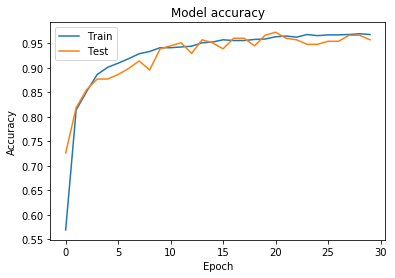

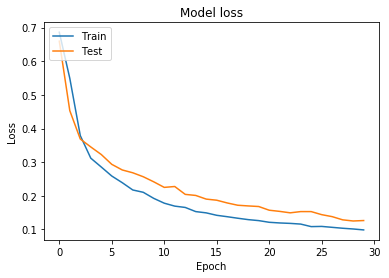

In [8]:
history = classifier.fit(x_test, y_test, validation_split=0.20, epochs=30, batch_size=10, verbose=0)

# 学習とテストの正答率をプロット
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 学習とテストの損失をプロット
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()